# **DATA SCIENCE ITINERARY - IT ACADEMY**

# <center><b><u>Sprint 10. Supervised Regression</u></b><center>

## **DATASET INFORMATION**

+ According to a 2010 report made by the US Federal Aviation Administration, the economic price of domestic flight delays entails a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. More than half of that amount comes from the pockets of passengers who not only lose time waiting for their planes to leave, but they also miss connecting flights, spend money on food and have to sleep on hotel rooms while they're stranded.

+ The report, focusing on data from year 2007, estimated that air transportation delays put a 4 billion dollar dent in the country's gross domestic product that year The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS). 

_**But, what are the causes for these delays?**_

+ In order to answer this question, we are going to analyze the provided dataset, containing up to 1.936.758 different internal flights in the US for 2008.
-----------



+ **Year** 2008
+ **Month** 1-12
+ **DayOfMonth** 1-31
+ **DayOfWeek** 1 (Monday) - 7 (Sunday)
+ **DepTime** actual departure time (local, hhmm)
+ **CRSDepTime** scheduled departure time (local, hhmm)
+ **ArrTime** actual arrival time (local, hhmm)
+ **CRSArrTime** scheduled arrival time (local, hhmm)
+ **UniqueCarrier** unique carrier code
+ **FlightNum** flight number
+ **TailNum** plane tail number: aircraft registration, unique aircraft identifier
+ **ActualElapsedTime** in minutes
+ **CRSElapsedTime** in minutes
+ **AirTime** in minutes
+ **ArrDelay** arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
+ **DepDelay** departure delay, in minutes
+ **Origin** origin IATA airport code
+ **Dest** destination IATA airport code
+ **Distance** in miles
+ **TaxiIn** taxi in time, in minutes
+ **TaxiOut** taxi out time in minutes
+ **Cancelled** was the flight cancelled
+ **CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
+ **Diverted** 1 = yes, 0 = no
+ **CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
+ **WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
+ **NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
+ **SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
+ **LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [536]:
# Libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics as stat
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from sklearn.metrics import r2_score

In [537]:
# CSV. This dataset has been cleaned in the previous task and now we import it to work regressions

airlines = pd.read_csv('/Users/adrianova/Desktop/Data Science/Python/IT Academy - Python/SPRINT 10 - Aprenentatge Supervisat - Regressions/S10 T01_ Practicant amb training i test sets/clean_airlines_df.csv')
pd.set_option('display.max_columns', None)
airlines = airlines.drop(['Unnamed: 0'], axis = 1)
airlines.head()

,FlightDate_USA,UniqueCarrier,Origin,Dest,Cancelled,Diverted,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,WN,IAD,TPA,0,0,2003,1955,2211.0,2225,335,128.0,150.0,116.0,-14.0,8,810,0,0,0,0,0
1,2008-01-03,WN,IAD,TPA,0,0,754,735,1002.0,1000,3231,128.0,145.0,113.0,2.0,19,810,0,0,0,0,0
2,2008-01-03,WN,IND,BWI,0,0,628,620,804.0,750,448,96.0,90.0,76.0,14.0,8,515,0,0,0,0,0
3,2008-01-03,WN,IND,BWI,0,0,1829,1755,1959.0,1925,3920,90.0,90.0,77.0,34.0,34,515,2,0,0,0,32
4,2008-01-03,WN,IND,JAX,0,0,1940,1915,2121.0,2110,378,101.0,115.0,87.0,11.0,25,688,0,0,0,0,0


FLIGHTS THAT ARRIVE 15 MINUTES EARLY AFTER THE EXPECTED TIME OF ARRIVAL ARE COUNTED AS HAVING ARRIVED ON TIME, MANY OF THE REASONS FOR THEIR DELAYS (WEATHER DELAY, CARRIER DELAY, ETC) ARE NOT RECORDED, THEREFORE WE WE WILL CONSIDER IT AS IF IT WERE 0 MINUTES.

In [538]:
# Shape. 1.936.758 rows and 22 columns
airlines.shape

(1936758, 22)

In [539]:
# Description
round(airlines.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
Cancelled,1936758.0,0.00,0.02,0.0,0.0,0.0,0.0,1.0
Diverted,1936758.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0
DepTime,1936758.0,1518.53,450.49,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,1467.47,424.77,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1929648.0,1610.14,548.18,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,1936758.0,1634.22,464.63,0.0,1325.0,1705.0,2014.0,2400.0
FlightNum,1936758.0,2184.26,1944.70,1.0,610.0,1543.0,3422.0,9742.0
ActualElapsedTime,1928371.0,133.31,72.06,14.0,80.0,116.0,165.0,1114.0
CRSElapsedTime,1936560.0,134.30,71.34,-25.0,82.0,116.0,165.0,660.0
AirTime,1928371.0,108.28,68.64,0.0,58.0,90.0,137.0,1091.0


In [540]:
# Information about data
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FlightDate_USA     object 
 1   UniqueCarrier      object 
 2   Origin             object 
 3   Dest               object 
 4   Cancelled          int64  
 5   Diverted           int64  
 6   DepTime            int64  
 7   CRSDepTime         int64  
 8   ArrTime            float64
 9   CRSArrTime         int64  
 10  FlightNum          int64  
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           int64  
 16  Distance           int64  
 17  CarrierDelay       int64  
 18  WeatherDelay       int64  
 19  NASDelay           int64  
 20  SecurityDelay      int64  
 21  LateAircraftDelay  int64  
dtypes: float64(5), int64(13), object(4)
memory usage: 325.1+ MB


In [541]:
# Missings
round((airlines.isna().sum())/len(airlines)*100,2)

FlightDate_USA       0.00
UniqueCarrier        0.00
Origin               0.00
Dest                 0.00
Cancelled            0.00
Diverted             0.00
DepTime              0.00
CRSDepTime           0.00
ArrTime              0.37
CRSArrTime           0.00
FlightNum            0.00
ActualElapsedTime    0.43
CRSElapsedTime       0.01
AirTime              0.43
ArrDelay             0.43
DepDelay             0.00
Distance             0.00
CarrierDelay         0.00
WeatherDelay         0.00
NASDelay             0.00
SecurityDelay        0.00
LateAircraftDelay    0.00
dtype: float64

In [542]:
# Diverted and cancelled variables (are the cause of our missings)
print(airlines['Cancelled'].value_counts(), '\n', airlines['Diverted'].value_counts())

0    1936125
1        633
Name: Cancelled, dtype: int64 
 0    1929004
1       7754
Name: Diverted, dtype: int64


+ THE SUM OF **'CANCELED'** AND **'DIVERTED'** FLIGHTS GIVES US THE NUMBER OF MISSINGS FOR THE VARIABLES **'ACTUALELAPSEDTIME'**, **'AIRTIME'** AND **'ARRDELAY'**, WHERE THERE ARE NO RECORDS BECAUSE THE FLIGHTS NEVER ARRIVED AT THE DESTINATION. THEY ARE A VERY LOW PERCENTAGE OF THE SIZE OF THE DATASET (< 1%), FOR THAT REASON, WE WILL PROCEED TO ELIMINATE THEM. IF WE ELIMINATE THE MISSINGS, **CANCELED** AND **DIVERTED** VARIABLES WILL NOT HAVE ANY USE IN OUR SET AND THEREFORE WE ALSO ELIMINATE THEM.


In [543]:
# Drop NaNs
airlines.dropna(inplace=True)
airlines.drop(['Cancelled','Diverted'], axis = 1, inplace= True)

# **EXERCISE 1**
**STATEMENT:** Create at least three different regression models to try to predict DelayedFlights.csv's flight delay (ArrDelay) as best as possible.


+ LET'S CREATE THE FOLLOWING 4 REGRESSION MODELS:

     + MULTIPLE LINEAR REGRESSION MODEL
     + DECISION TREE REGRESSION MODEL
     + RANDOM FOREST MODEL
     + NEURONAL NETWORK MODEL

#### **MATRIX**

FIRST OF ALL WE WILL MAKE A MATRIX OF CORRELATIONS TO SEE THE RELATIONSHIPS BETWEEN VARIABLES AND THE RELATIONSHIP WITH OUR TARGET VARIABLE

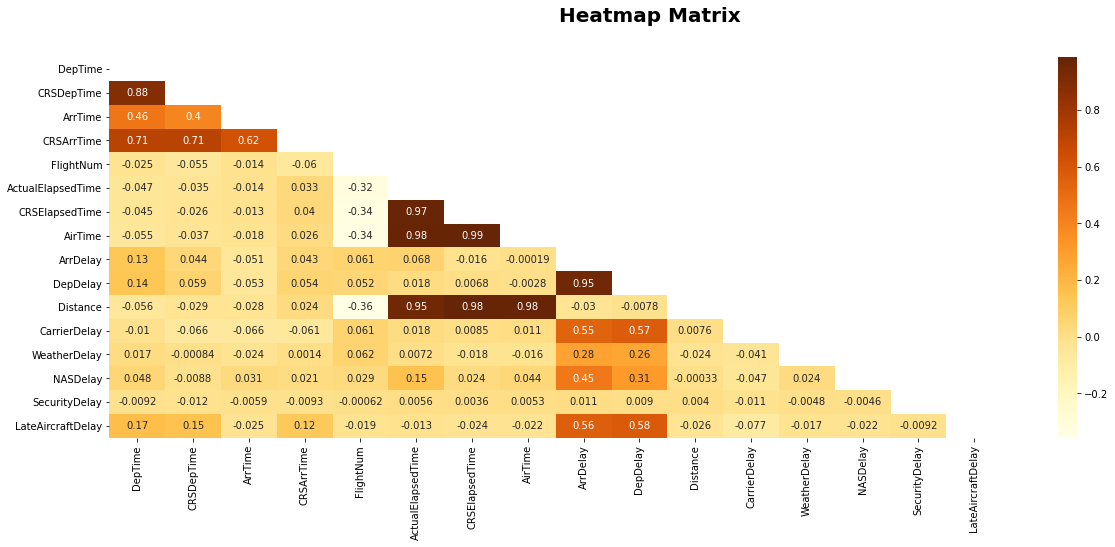

In [544]:
# Correlations Matrix

# Framework
fig, ax = plt.subplots(figsize = (20,7))

# Data
correlation_matrix = airlines.corr(method='pearson')
half_matrix = np.triu(correlation_matrix)

# Plot
sns.heatmap(correlation_matrix, annot = True, mask = half_matrix, cmap = sns.color_palette("YlOrBr", as_cmap=True))
fig.suptitle('Heatmap Matrix', fontsize = 20, fontweight = 'bold')
plt.show()

 **CONCLUSIONS**

THE VARIABLES THAT BEST EXPLAIN THE DELAY OF PLANES ON ARRIVAL ARE THE FLIGHTS DELAY ON DEPARTURE AND THE DIFFERENT TYPES OF DELAY THAT OCCUR ON EACH FLIGT, SUCH AS DELAYS DUE TO BAGGAGE, TIME, SECURITY, AIR SYSTEM OR ACCUMULATED DELAY OF AIRPORTS.

**1** AIRCRAFT TIME OF FLIGHT IS HIGHLY CORRELATED TO AIRCRAFT REAL AND SCHEDULED ELAPSED TIME VARIABLES. AT THE SAME TIME, IT IS OBVIOUS THAT THERE IS A HIGH RELATIONSHIP BETWEEN THE REAL TIME AND THE ELAPSED TIME OF THE AIRPLANES, SINCE THESE VALUES ARE ESTABLISHED BECAUSE THEY ARE FULFILLED IN REALITY.

**2** THE DISTANCE FROM ONE PLACE TO ANOTHER IS ALSO HIGHLY CORRELATED TO REAL AND SCHEDULED TIME, SINCE THE GREATER THE DISTANCE, THE MORE TIME IT WILL TAKE FOR THE PLANE TO REACH THE DESTINATIONS, AND VICECERSA. AT THE SAME TIME IT IS ALSO CORRELATED TO THE TIME OF FLIGHT.

**3** OTHER RELATIONSHIPS APPEAR WITH ACTUAL AND SCHEDULED DEPARTURE AND ARRIVAL TIME AND TIME OF FLIGHT, AS YOU WOULD EXPECT.

#### **VIF (VARIANCE INFLATION FACTOR)**

WE CAN USE THE **VIF** TO DETECT MULTICOLINEARITY BETWEEN VARIABLES. THIS EVENT HAPPENS WHEN SOME VARIABLES ARE SO CORRELATED THAT IT IS POSSIBLE THAT WE HAVE DIFFICULTY IN DISTINGUISHING BETWEEN THEIR INDIVIDUAL EFFECTS ON THE DEPENDENT VARIABLE. USUALLY, A VIF ABOVE 5 INDICATES HIGH MULTICOLINEARITY.

**FORMULA** **VIF = 1/1-R2**

In [545]:
# VIF

# Select only numerical variables
X = airlines.select_dtypes(include = ['float64', 'int'])

def vif(X):
    vif_data = pd.DataFrame() # Empty data frame
    vif_data['feature'] = X.columns # Include the columns name into dataframe
    vif_data['Variance Inflation Factor(VIF)'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

In [546]:
vif(X)

,feature,Variance Inflation Factor(VIF)
0,DepTime,6.412158e+01
1,CRSDepTime,6.327392e+01
2,ArrTime,1.586974e+01
3,CRSArrTime,3.868349e+01
4,FlightNum,2.403385e+00
5,ActualElapsedTime,3.690617e+09
6,CRSElapsedTime,3.709923e+09
7,AirTime,2.061307e+02
8,ArrDelay,8.044549e+08
9,DepDelay,7.544425e+08


WE CAN SEE HOW THE VARIABLES **CRSDEPTIME, CERSARRTIME ,ACTUALELAPSEDTIME, FLIGHTNUM, CRSELAPSEDTIME, AIRTIME, ARRDELAY, AND DEPDELAY** ARE THE VARIABLES THAT PRESENT MORE MULTICOLINEARITY AS WE HAVE BEEN ABLE TO SEE IN THE MATRIX OF CORRELATIONS, ANYWAY WE WILL ONLY ELIMINATE THE FIRST SIX, SINCE THE OTHER TWO ARE KEY TO OUR ANALYSIS.

In [547]:
X.drop(['CRSDepTime','CRSArrTime','ActualElapsedTime','FlightNum','CRSElapsedTime', 'AirTime'], axis= 1, inplace=True)

/Users/adrianova/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [548]:
vif(X)

,feature,Variance Inflation Factor(VIF)
0,DepTime,11.961861
1,ArrTime,10.658352
2,ArrDelay,216.929843
3,DepDelay,22.948605
4,Distance,2.447567
5,CarrierDelay,62.059887
6,WeatherDelay,13.798636
7,NASDelay,37.107139
8,SecurityDelay,1.107245
9,LateAircraftDelay,65.380377


ALTHOUGH WE FIND SEVERAL VARIABLES THAT PRESENT MULTICOLINEARITY, WE WILL USE THESE VARIABLES FOR THE MODELS AT FIRST.

#### **TRAIN TEST SET**

In [549]:
# We are going to work with a little sample of 200k

airlines_sample = X.sample(n = 200000, random_state=42)

# Features
X = airlines_sample.drop(['ArrDelay'], axis = 1)
X_list_names = list(X.columns)

# Target
y = airlines_sample['ArrDelay']

In [550]:
# Split the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [551]:
# Check the len
print(X_train.shape, '\n', X_test.shape, '\n', y_train.shape, '\n', y_test.shape)

(150000, 9) 
 (50000, 9) 
 (150000,) 
 (50000,)


### **MULTIPLE LINEAR REGRESSION MODEL**

In [552]:
# MODEL 1. MLRM (sklearn)

model_1_MLRM = LinearRegression().fit(X_train, y_train)
results = pd.DataFrame({'Intercept': model_1_MLRM.intercept_, 'Coefficients': model_1_MLRM.coef_,})
results

,Intercept,Coefficients
0,2.907659,-0.000160
1,2.907659,-0.000158
2,2.907659,0.059273
3,2.907659,-0.001184
4,2.907659,0.929395
5,2.907659,0.934521
6,2.907659,0.943707
7,2.907659,0.915303
8,2.907659,0.925878


In [553]:
# predictions
prediction_MLRM = model_1_MLRM.predict(X_test)
prediction_accuracy_MLRM = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': prediction_MLRM})
prediction_accuracy_MLRM.head(10)

,Actual Target,Predicted Target
591796,57.0,58.015323
930067,115.0,115.424191
636819,11.0,-1.122911
184894,24.0,26.290300
1061824,88.0,87.513546
1798303,9.0,3.702756
1823507,4.0,2.385529
852982,35.0,36.425670
733165,-4.0,2.085376
914873,3.0,1.157983


In [554]:
# MODEL 1. MLRM (StatsModel)
X_add_Constant = sm.add_constant(X)
model_1_MLRM_statsmodel = sm.OLS(y, X_add_Constant).fit()
print(model_1_MLRM_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.182e+06
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:22:38   Log-Likelihood:            -5.9539e+05
No. Observations:              200000   AIC:                         1.191e+06
Df Residuals:                  199990   BIC:                         1.191e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.8769      0.04

FOR THE MULTIPLE LINEAR REGRESSION MODEL, WE SEE CLEAR PREDICTION ERRORS, SO NOW IT WOULD NOT BE A GOOD PREDICTION MODEL.

### **DECISION TREE REGRESSION MODEL**

In [555]:
# MODEL 2. Decision Tree Regression

model_2_DTRM = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# Predictions
prediction_DTRM = model_2_DTRM.predict(X_test)
prediction_accuracy_DTRM = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': prediction_DTRM})
prediction_accuracy_DTRM.head(10)


,Actual Target,Predicted Target
591796,57.0,57.0
930067,115.0,116.0
636819,11.0,4.0
184894,24.0,24.0
1061824,88.0,88.0
1798303,9.0,12.0
1823507,4.0,13.0
852982,35.0,35.0
733165,-4.0,8.0
914873,3.0,9.0


In [556]:
# Feature importances
importances = list(model_2_DTRM.feature_importances_)

feature_importance = [(feature, round(importance, 2)) for feature, importance
 in zip(X_list_names, importances)]

# Ordering feature importances
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse=True)

# Print
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

Variable: DepDelay             Importance: 0.9
Variable: NASDelay             Importance: 0.07
Variable: CarrierDelay         Importance: 0.01
Variable: LateAircraftDelay    Importance: 0.01
Variable: DepTime              Importance: 0.0
Variable: ArrTime              Importance: 0.0
Variable: Distance             Importance: 0.0
Variable: WeatherDelay         Importance: 0.0
Variable: SecurityDelay        Importance: 0.0


[None, None, None, None, None, None, None, None, None]

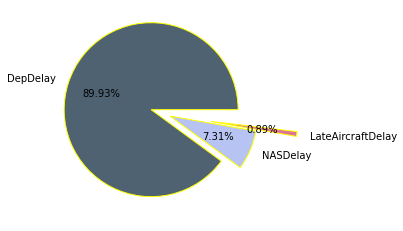

In [557]:
# Plotting

# Data
chart = pd.Series(model_2_DTRM.feature_importances_, index=X_list_names)
chart = chart.nlargest(3)

# Chart
colors = ['#4F6272', '#B7C3F3', '#DD7596']
explode = [0.2,0.03,0.5]
plt.pie(chart.values, labels=chart.index, labeldistance=1.15, autopct='%.2f%%',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'yellow' }, colors = colors, explode = explode, normalize= False)
plt.show()

IN THE DECISION TREE REGRESSION WE CAN SEE HOW THE VARIABLES THAT HAVE MORE WEIGHT IN THE MODEL ARE **'DEPDELAY'** AND **'LATEAIRCRAFTDELAY'**, THE REST VARIABLES HAVE LITTLE PARTICIPATION.

### **RANDOM FOREST REGRESSOR**

In [558]:
# MODEL 3. Random Forest

model_3_RF = RandomForestRegressor( random_state=42).fit(X_train, y_train)

In [559]:
# Predictions
prediction_RF = model_3_RF.predict(X_test)
prediction_accuracy_RF = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': prediction_RF})
prediction_accuracy_RF.head(10)

,Actual Target,Predicted Target
591796,57.0,56.89
930067,115.0,115.41
636819,11.0,1.43
184894,24.0,24.00
1061824,88.0,87.82
1798303,9.0,11.93
1823507,4.0,7.25
852982,35.0,35.00
733165,-4.0,0.28
914873,3.0,3.87


In [560]:
# Feature importances
importances = list(model_3_RF.feature_importances_)

feature_importance = [(feature, round(importance, 2)) for feature, importance
 in zip(X_list_names, importances)]

# Ordering feature importances
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse=True)

# Print
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

Variable: DepDelay             Importance: 0.9
Variable: NASDelay             Importance: 0.07
Variable: CarrierDelay         Importance: 0.01
Variable: LateAircraftDelay    Importance: 0.01
Variable: DepTime              Importance: 0.0
Variable: ArrTime              Importance: 0.0
Variable: Distance             Importance: 0.0
Variable: WeatherDelay         Importance: 0.0
Variable: SecurityDelay        Importance: 0.0


[None, None, None, None, None, None, None, None, None]

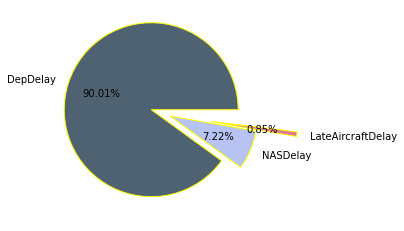

In [561]:
# Plotting

# Data
chart = pd.Series(model_3_RF.feature_importances_, index=X_list_names)
chart = chart.nlargest(3)

# Chart
colors = ['#4F6272', '#B7C3F3', '#DD7596']
explode = [0.2,0.03,0.5]
plt.pie(chart.values, labels=chart.index, labeldistance=1.15, autopct='%.2f%%',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'yellow' }, colors = colors, explode = explode, normalize= False)
plt.show()

### **NEURONAL NETWORK**

In [562]:
# MODEL 4. Neuronal Network

model_4_NN = MLPRegressor(hidden_layer_sizes=(len(X_train.columns),len(X_train.columns),len(X_train.columns)), activation='relu', solver='adam', max_iter=500).fit(X_train, y_train)

In [563]:
# Predictions
prediction_NN = model_4_NN.predict(X_test)
prediction_accuracy_NN = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': prediction_NN})
prediction_accuracy_NN.head(10)

,Actual Target,Predicted Target
591796,57.0,57.221566
930067,115.0,115.365753
636819,11.0,-4.305626
184894,24.0,24.125818
1061824,88.0,87.772572
1798303,9.0,6.534618
1823507,4.0,2.974184
852982,35.0,35.070082
733165,-4.0,2.537715
914873,3.0,-1.716579


# **EXERCISE 2**
**STATEMENT:** Compare them based on MSE and R2.

In [564]:
def validation_model(model, prediction):
    print('Coefficient of determination (R2):', model.score(X_test, y_test))
    print('Mean Absolute Error (MAE):', mean_absolute_error(y_test ,prediction))
    print('Mean Squared Error (MSE):', mean_squared_error(y_test ,prediction))
    print('Root Mean Squared Error (RMSE):', sqrt(mean_squared_error(y_test ,prediction)))

# Multiple Linear Regression Model 
print('Multiple Linear Regression Model:\n')
print(validation_model(model_1_MLRM, prediction_MLRM))

# Decision Tree Regression Model
print('Decision Tree Regression Model:\n')
print(validation_model(model_2_DTRM, prediction_DTRM))

# Random Forest Model
print('Random Foresst Model:\n')
print(validation_model(model_3_RF, prediction_RF))

# Neuronal Netwok Model
print('Neuronal Network Model:\n')
print(validation_model(model_4_NN, prediction_NN))

Multiple Linear Regression Model:

Coefficient of determination (R2): 0.9933332149825412
Mean Absolute Error (MAE): 3.0278255862174834
Mean Squared Error (MSE): 22.473173457266018
Root Mean Squared Error (RMSE): 4.740587880977001
None
Decision Tree Regression Model:

Coefficient of determination (R2): 0.9835508858408349
Mean Absolute Error (MAE): 3.50273
Mean Squared Error (MSE): 55.448585
Root Mean Squared Error (RMSE): 7.446380664457062
None
Random Foresst Model:

Coefficient of determination (R2): 0.9910511095206994
Mean Absolute Error (MAE): 2.6071602880952383
Mean Squared Error (MSE): 30.16595967392661
Root Mean Squared Error (RMSE): 5.492354656604634
None
Neuronal Network Model:

Coefficient of determination (R2): 0.9947741156091361
Mean Absolute Error (MAE): 2.051480731116633
Mean Squared Error (MSE): 17.61601822706903
Root Mean Squared Error (RMSE): 4.197144056030128
None


AFTER EVALUATING THE FOUR MODELS THAT WE HAVE DONE, WE SEE THAT MODEL THAT PRESENTS FEWER ERRORS IN ITS FIT IS THE NEURAL NETWORK.

# **EXERCISE 3**
**STATEMENT:** Train them using the different parameters they support.

### **MULTIPLE LINEAR REGRESSION MODEL**

THIS MODEL ACCEPTS 5 DIFFERENT PARAMETERS. WE WILL FOCUS ON 3 OF THEM:

+ **FIT_INTERCEPT:** IF WE DECLARE THIS PARAMETER 'FALSE' THERE WILL BE NO Bo
+ **NORMALIZE:** THIS PARAMETER IS IGNORED WHEN WE DECLARE INTERCEPT = FALSE. IF THIS PARAMETER IS TRUE WE WILL NORMALIZE THE PREDICTOR VARIABLES
 + **N_JOBS:** IT IS THE NUMBER OF JOBS WE USE FOR COMPUTING. IF WE DECLARE -1 WE WILL BE USING ALL PROCESSORS.

IN OUR EXAMPLE WE WILL REMOVE THE INTERCEPT AND SEE THAT OUR MODEL GETS WORSE. BY REMOVING THE INTERCEPT THE PREDICTOR VARIABLES WILL NOT BE NORMALIZED, BUT LATER WE WILL APPLY FEATURE ENGINEERING TECHNIQUES

In [565]:
# Model 1. MRLM

model_1_MLRM_new_parameters = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1).fit(X_train, y_train)
results_new_parameters = pd.DataFrame({'Intercept': model_1_MLRM_new_parameters.intercept_, 'Coefficients': model_1_MLRM_new_parameters.coef_,})
results_new_parameters

,Intercept,Coefficients
0,0.0,0.000788
1,0.0,0.000396
2,0.0,0.062039
3,0.0,-0.000743
4,0.0,0.929066
5,0.0,0.934158
6,0.0,0.942854
7,0.0,0.921551
8,0.0,0.923863


In [566]:
# predictions

prediction_MLRM_new_parameters = model_1_MLRM_new_parameters.predict(X_test)
prediction_accuracy_MLRM_new_parameters = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': prediction_MLRM_new_parameters})
prediction_accuracy_MLRM_new_parameters.head(10)

,Actual Target,Predicted Target
591796,57.0,58.377551
930067,115.0,114.572508
636819,11.0,-0.198720
184894,24.0,25.311415
1061824,88.0,87.848370
1798303,9.0,2.488618
1823507,4.0,2.727249
852982,35.0,35.895726
733165,-4.0,1.540333
914873,3.0,1.686722


In [567]:
# Multiple Linear Regression Validation Model
print('Multiple Linear Regression Model with new parameters:\n')
print(validation_model(model_1_MLRM_new_parameters, prediction_MLRM_new_parameters))

Multiple Linear Regression Model with new parameters:

Coefficient of determination (R2): 0.9932014411712569
Mean Absolute Error (MAE): 3.0086890016350183
Mean Squared Error (MSE): 22.917371929297794
Root Mean Squared Error (RMSE): 4.787209200494354
None


### **DECISION TREE REGRESSION MODEL**

THE MODEL ACCEPTS MANY PARAMETERS BUT WE WILL FOCUS ON THE MOST COMMON:

+ **SPLITTER:** IT IS THE STRATEGY USED TO CHOOSE THE DIVISION OF EACH NODE. 'BEST' TO CHOOSE THE BEST DIVISION AND 'RANDOM' TO CHOOSE THE BEST RANDOM DIVISION.

+ **MAX_DEPTH:** IT IS A NUMBER THAT DETERMINES THE DEPTH OF THE TREE. IF 'DEFAULT' NODES EXPAND UNTIL ALL LEAVES ARE PURE OR UNTIL ALL LEAVES CONTAIN LESS THAN 'MIN_SAMPLES_SPLIT' SAMPLES.

+ **MIN_SAMPLES_SPLIT:** IT IS THE MINIMUM NUMBER OF SAMPLES REQUIRED TO SPLIT AN INTERNAL NODE.

+ **MIN_SAMPLES_SPLIT:** THE MINIMUM NUMBER OF SAMPLES REQUIRED TO BE IN A NODE.

+ **MAX_FEATURES:** THE NUMBER OF VARIABLES TO CONSIDER WHEN SEARCHING FOR THE BEST DIVISION
    

In [568]:
# Let's analyze the optimal 'max_depth' from the MAE
max_depths = np.linspace(1,30, 30)
errors = []

for max_depth in max_depths:
    decision_tree = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    decision_tree_prediction = decision_tree.predict(X_test)
    errors.append(mean_absolute_error(y_test, decision_tree_prediction))

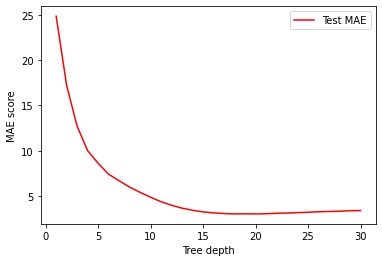

In [569]:
# Plot
red_line = plt.plot(max_depths, errors, 'r', label = 'Test MAE')
plt.xlabel('Tree depth'); plt.ylabel('MAE score'); plt.legend(); plt.show()

WE CAN SEE THAT FROM DEPTH LEVEL 15, ERRORS ARE REDUCED TO THE MAXIMUM.

In [570]:
# MODEL 2. Decision Tree Regression

model_2_DTRM_new_parameters = DecisionTreeRegressor(max_depth=15 ,random_state=42).fit(X_train, y_train)

# Predictions
prediction_DTRM_new_parameters = model_2_DTRM_new_parameters.predict(X_test)
prediction_accuracy_DTRM_new_parameters = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': prediction_DTRM_new_parameters})
prediction_accuracy_DTRM_new_parameters.head(10)

,Actual Target,Predicted Target
591796,57.0,57.333333
930067,115.0,116.200000
636819,11.0,-3.023810
184894,24.0,24.000000
1061824,88.0,87.918367
1798303,9.0,10.065920
1823507,4.0,3.093520
852982,35.0,35.363636
733165,-4.0,1.721046
914873,3.0,-0.250000


In [571]:
# Decision Tree Regression Model
print('Decision Tree Regression Model with new parameters:\n')
print(validation_model(model_2_DTRM_new_parameters, prediction_DTRM_new_parameters))

Decision Tree Regression Model with new parameters:

Coefficient of determination (R2): 0.987653466852421
Mean Absolute Error (MAE): 3.2232016753862647
Mean Squared Error (MSE): 41.61912830469426
Root Mean Squared Error (RMSE): 6.451288887090258
None


WE HAVE MANAGED TO REDUCE THE ERROR THANKS TO APPLYING 'MAX_DEPTH = 15' TO THE MODEL.

### **RANDOM FOREST REGRESSOR**

THE MODEL ACCEPTS MANY PARAMETERS BUT WE WILL ONLY FOCUS ON DESCRIBING THE MOST IMPORTANT:

+ **N_ESTIMATORS:** THE NUMBER OF TREES THAT THE MODEL HAS

+ **MAX_DEPTHS:** THE MAXIMUM DEPTH OF THE TREE

+ **MIN_SAMPLE_SPLIT:** THE MINIMUM NUMBER OF SAMPLES REQUIRED TO SPLIT AN INTERNAL NODE

+ **MIN_SAMPLE_LEAF:** THE MINIMUM NUMBER OF SAMPLES REQUIRED TO BE IN A NODE

+ **MAX_FEATURES:** THE NUMBER OF VARIABLES TO CONSIDER WHEN SEARCHING FOR THE BEST DIVISION

+ **N_JOBS:** THE NUMBER OF JOBS TO EXECUTE IN PARALLEL

In [572]:
# Let's analyze the optimal 'n_estimators' from the MAE
n_estimators = np.arange(1,100, 17)
errors = []

for n_estimator in n_estimators:
    random_forest = RandomForestRegressor(n_estimators=n_estimator).fit(X_train, y_train)
    random_forest_prediction = random_forest.predict(X_test)
    errors.append(mean_absolute_error(y_test, random_forest_prediction))


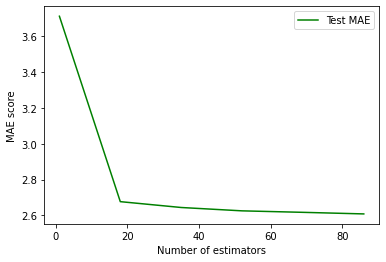

In [573]:
# Plot
green_line = plt.plot(n_estimators, errors, 'g', label = 'Test MAE')
plt.xlabel('Number of estimators'); plt.ylabel('MAE score'); plt.legend(); plt.show()

In [574]:
# Let's analyze the optimal 'max_depth' from the MAE
max_depths = np.linspace(1,30, 5)
errors = []

for max_depth in max_depths:
    random_forest = RandomForestRegressor(max_depth=max_depth).fit(X_train, y_train)
    random_forest_prediction = random_forest.predict(X_test)
    errors.append(mean_absolute_error(y_test, random_forest_prediction))


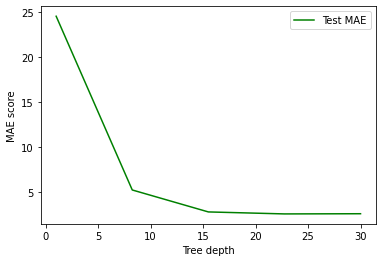

In [575]:
# Plot
green_line = plt.plot(max_depths, errors, 'g', label = 'Test MAE')
plt.xlabel('Tree depth'); plt.ylabel('MAE score'); plt.legend(); plt.show()

ANALYZING THE NUMBER OF ESTIMATORS WE SEE HOW FROM ESTIMATOR 20 THE LINE BEGINS TO STABILIZE AND THE REDUCTION OF ERRORS IS GETTING BETTER. REGARDING THE NUMBER OF TREES, WE SEE THAT THE ERRORS STABILIZE FROM 15.

In [576]:
# MODEL 3. Random Forest Regression

model_3_RF_new_parameters = RandomForestRegressor(n_estimators= 100, max_depth= 15, random_state=42).fit(X_train, y_train)
prediction_RF_new_parameters = model_3_RF_new_parameters.predict(X_test)
prediction_accuracy_RF_new_parameters = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': prediction_RF_new_parameters})
prediction_accuracy_RF_new_parameters.head(10)

,Actual Target,Predicted Target
591796,57.0,56.695295
930067,115.0,115.587279
636819,11.0,-0.747645
184894,24.0,24.008031
1061824,88.0,87.282384
1798303,9.0,9.916693
1823507,4.0,2.610403
852982,35.0,34.524356
733165,-4.0,-0.054881
914873,3.0,0.256087


In [577]:
# Random Forest Model
print('Random Foresst Model with new parameters:\n')
print(validation_model(model_3_RF_new_parameters, prediction_RF_new_parameters))

Random Foresst Model with new parameters:

Coefficient of determination (R2): 0.990782359773245
Mean Absolute Error (MAE): 2.791844181320826
Mean Squared Error (MSE): 31.071892544916487
Root Mean Squared Error (RMSE): 5.5742167651533325
None


### **NEURONAL NETWORK**

IN THE FIRST EXERCISE WE HAVE USED THE PARAMETERS TO OPTIMIZE THE MODEL TO THE MAXIMUM AND AT THE MOMENT IT IS THE ONE THAT GIVES US THE BEST RESULT.

# **EXERCISE 4**
**STATEMENT:** Compare your performance using the traint / test approach or using all data (internal validation)

WE WILL DO INTERNAL VALIDATION USING ALL DATA, SINCE WE HAVE PREVIOUSLY USED THE TRAIN / TEST TO ADJUST THE MODEL. THIS WAY WE CAN MAKE A COMPARISON ON THE PERFORMANCE OF THE MODEL.

In [578]:
# The data without train/test

X_dataset = airlines_sample.drop(['ArrDelay'], axis=1)
y_dataset = airlines_sample['ArrDelay']

In [579]:
# Validation

def validation_model2(model, prediction):
    print('Coefficient of determination (R2):', model.score(X_dataset, y_dataset))
    print('Mean Absolute Error (MAE):', mean_absolute_error(y_dataset ,prediction))
    print('Mean Squared Error (MSE):', mean_squared_error(y_dataset ,prediction))
    print('Root Mean Squared Error (RMSE):', sqrt(mean_squared_error(y_dataset ,prediction)))
    

### **MULTIPLE LINEAR REGRESSION MODEL**

In [580]:
# MODEL 1. MLRM

model_1_MLRM_all_data = LinearRegression(n_jobs=-1).fit(X_dataset, y_dataset)
results_all_data = pd.DataFrame({'Intercept': model_1_MLRM_all_data.intercept_, 'Coefficients': model_1_MLRM_all_data.coef_,})
results_all_data

,Intercept,Coefficients
0,2.876945,-0.000155
1,2.876945,-0.000150
2,2.876945,0.059622
3,2.876945,-0.001179
4,2.876945,0.929302
5,2.876945,0.934190
6,2.876945,0.943642
7,2.876945,0.913652
8,2.876945,0.925619


In [581]:
# predictions

prediction_MLRM_all_data = model_1_MLRM_all_data.predict(X_dataset)
prediction_accuracy_MLRM_all_data = pd.DataFrame({'Actual Target': y_dataset, 'Predicted Target': prediction_MLRM_all_data})
prediction_accuracy_MLRM_all_data.head(10)

,Actual Target,Predicted Target
403778,6.0,2.760846
1397595,35.0,35.167970
1849546,10.0,2.808318
18418,73.0,72.736802
1805454,49.0,50.054196
1204266,28.0,29.177736
1201103,148.0,147.467590
893884,-8.0,1.795105
1392207,56.0,57.135895
1557182,8.0,2.565721


In [582]:
# Multiple Linear Regression Validation Model

print('Multiple Linear Regression Model all data:\n')
print(validation_model2(model_1_MLRM_all_data, prediction_MLRM_all_data))

Multiple Linear Regression Model all data:

Coefficient of determination (R2): 0.9930643731376018
Mean Absolute Error (MAE): 3.0342124814802416
Mean Squared Error (MSE): 22.55612651209196
Root Mean Squared Error (RMSE): 4.749329059150562
None


THE RESULT IS VERY SIMILAR TO THE MODEL TAKING INTO ACCOUNT THE TRAIN/TEST

### **DECISION TREE REGRESSION MODEL**

In [583]:
# MODEL 2. Decision Tree Regression

model_2_DTRM_all_data = DecisionTreeRegressor(max_depth=15 ,random_state=42).fit(X_dataset, y_dataset)

# Predictions
prediction_DTRM_all_data = model_2_DTRM_all_data.predict(X_dataset)
prediction_accuracy_DTRM_all_data = pd.DataFrame({'Actual Target': y_dataset, 'Predicted Target': prediction_DTRM_all_data})
prediction_accuracy_DTRM_all_data.head(10)

,Actual Target,Predicted Target
403778,6.0,4.299712
1397595,35.0,34.000000
1849546,10.0,6.546233
18418,73.0,72.846154
1805454,49.0,49.000000
1204266,28.0,28.000000
1201103,148.0,148.857143
893884,-8.0,-0.240956
1392207,56.0,58.857143
1557182,8.0,7.700922


In [584]:
# Decision Tree Regression Model
print('Decision Tree Regression Model all data:\n')
print(validation_model2(model_2_DTRM_all_data, prediction_DTRM_all_data))

Decision Tree Regression Model all data:

Coefficient of determination (R2): 0.9930206653185041
Mean Absolute Error (MAE): 2.6677911424712235
Mean Squared Error (MSE): 22.698273590747593
Root Mean Squared Error (RMSE): 4.764270520315528
None


APPLYING ALL THE DATA TO THE DECISION TREE REGRESSION WE CAN SEE HOW THERE HAS BEEN AN IMPROVEMENT IN THE RESULTS.

### **RANDOM FOREST REGRESSOR**

In [585]:
# MODEL 3. Random Forest Regression

model_3_RF_all_data = RandomForestRegressor(n_estimators= 100, max_depth= 15, random_state=42).fit(X_dataset, y_dataset)
prediction_RF_all_data = model_3_RF_all_data.predict(X_dataset)
prediction_accuracy_RF_all_data = pd.DataFrame({'Actual Target': y_dataset, 'Predicted Target': prediction_RF_all_data})
prediction_accuracy_RF_all_data.head(10)

,Actual Target,Predicted Target
403778,6.0,4.246912
1397595,35.0,34.734247
1849546,10.0,6.873382
18418,73.0,71.978033
1805454,49.0,49.031574
1204266,28.0,27.853186
1201103,148.0,147.000934
893884,-8.0,0.028542
1392207,56.0,58.281355
1557182,8.0,6.738809


In [586]:
# Random Forest Model
print('Random Foresst Model with all data:\n')
print(validation_model2(model_3_RF_new_parameters, prediction_RF_all_data))

Random Foresst Model with all data:

Coefficient of determination (R2): 0.9930498867594677
Mean Absolute Error (MAE): 2.4359169108447993
Mean Squared Error (MSE): 20.17344945672041
Root Mean Squared Error (RMSE): 4.491486330461266
None


TAKING INTO ACCOUNT ALL THE OBSERVATIONS OF THE SAMPLE, WE OBTAIN BETTER RESULTS IN THE ABSOLUTE ERROR BUT WORSE RESULTS IN THE OTHER INDICATORS.

### **NEURONAL NETWORK**

In [587]:
# MODEL 4. Neuronal Network
model_4_NN_all_data = MLPRegressor(hidden_layer_sizes=(len(X_dataset.columns),len(X_dataset.columns),len(X_dataset.columns)), activation='relu', solver='adam', max_iter=500).fit(X_dataset, y_dataset)

# Predictions
prediction_NN_all_data = model_4_NN_all_data.predict(X_dataset)
prediction_accuracy_NN_all_data = pd.DataFrame({'Actual Target': y_dataset, 'Predicted Target': prediction_NN_all_data})
prediction_accuracy_NN_all_data.head(10)

,Actual Target,Predicted Target
403778,6.0,4.547971
1397595,35.0,34.571517
1849546,10.0,6.142031
18418,73.0,72.974449
1805454,49.0,48.918570
1204266,28.0,27.917679
1201103,148.0,148.695630
893884,-8.0,0.168926
1392207,56.0,55.906622
1557182,8.0,5.442088


In [588]:
# Neuronal Netwok Model
print('Neuronal Network Model all data:\n')
print(validation_model2(model_4_NN_all_data, prediction_NN_all_data))

Neuronal Network Model all data:

Coefficient of determination (R2): 0.9944446337847012
Mean Absolute Error (MAE): 2.14624879091608
Mean Squared Error (MSE): 18.067226749559165
Root Mean Squared Error (RMSE): 4.250556051807712
None


THE RESULT IS VERY SIMILAR TO THE MODEL TAKING INTO ACCOUNT THE TRAIN/TEST

# **EXERCISE 5**
**STATEMENT:** Perform some variable engineering process to improve prediction

In [589]:
# Our dataset
airlines.head(3)

,FlightDate_USA,UniqueCarrier,Origin,Dest,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,WN,IAD,TPA,2003,1955,2211.0,2225,335,128.0,150.0,116.0,-14.0,8,810,0,0,0,0,0
1,2008-01-03,WN,IAD,TPA,754,735,1002.0,1000,3231,128.0,145.0,113.0,2.0,19,810,0,0,0,0,0
2,2008-01-03,WN,IND,BWI,628,620,804.0,750,448,96.0,90.0,76.0,14.0,8,515,0,0,0,0,0


WE WILL ADD A NEW VARIABLE TO THE MODEL **'AVERAGE SPEED OF THE PLANE'** AS WE ALREADY DID IN PREVIOUS EXERCISES WHEN WORKING WITH THIS DATASET.

In [590]:
# We make a sample 
numerical_variables = airlines.select_dtypes(include= ['float64', 'int'])
airlines_sample = numerical_variables.sample(n = 200000, random_state = 42)

### **AVERAGE SPEED**

In [591]:
# We describe the two variables of interest
print(round(airlines_sample['AirTime'].describe(),2), '\n',round(airlines_sample['Distance'].describe(),2))

count    200000.00
mean        108.30
std          68.48
min           1.00
25%          58.00
50%          90.00
75%         138.00
max         631.00
Name: AirTime, dtype: float64 
 count    200000.00
mean        765.32
std         572.52
min          31.00
25%         338.00
50%         606.00
75%         998.00
max        4962.00
Name: Distance, dtype: float64


WE CAN SEE THAT FOR **'AIRTIME'** AND **'DISTANCE'** WE OBTAIN VERY LOW MINIMUMS VALUES CONSIDERING THEM AS OUTLIERS


In [592]:
# We look at the number of planes that have an 'airtime' less than 15 (considering 15 minutes too short)

sum_of_values = []

for i in airlines_sample['AirTime']:
    if (i >= 0) and (i<15):
        sum_of_values.append(i)

#DF
pd.DataFrame(sum_of_values).sum()


0    1030.0
dtype: float64

WE CLEARLY SEE HOW THERE ARE MANY OBSERVATIONS WITH 'ARTIME' < 15 MINUTES. SO BEFORE CREATING 'AVERAGE SPEED' WE ARE GOING TO HAVE TO REMOVE THE OUTLIERS FROM THE MODEL.

In [593]:
# Eliminate outliers (we use IQR technique)
Q1 = airlines_sample.quantile(q = 0.25)
Q3 = airlines_sample.quantile(q = 0.75)
IQR = airlines_sample.apply(stats.iqr)

airlines_df = airlines_sample[~((airlines_sample < (Q1 -1.5 *IQR)) | (airlines_sample > (Q3 + 1.5 *IQR))).any(axis = 1)]
airlines_df.shape

(106659, 16)

ONCE WE HAVE FINISHED REMOVING THE OUTLIERS OF ALL THE NUMERICAL VARIABLES FROM COLLECTING THE IQR, WE PROCEED TO CREATE THE 'AVERAGE SPEED' VARIABLE WHICH USES TWO VARIABLES FROM THE DATAFRAME AND, THEREFORE, IT IS IMPORTANT THAT THE VALUES BE AS REALISTIC AS POSSIBLE .

THE 'AVERAGE SPEED' COULD ALLOW US TO ANALYZE IF THOSE AIRCRAFT THAT HAVE A LOWER 'ARRDELAY' IS BECAUSE THEY HAVE A HIGHER AVERAGE SPEED THAN THOSE THAT ARRIVE LATE DUE TO THEIR LOW AVERAGE SPEED.


In [594]:
# Average speed

airlines_df['Average_Speed'] = ((airlines_df['Distance'] *1.60934) / (airlines_df['AirTime']/60)).round(2)
airlines_df.head(2)

<ipython-input-594-37c935ece6a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines_df['Average_Speed'] = ((airlines_df['Distance'] *1.60934) / (airlines_df['AirTime']/60)).round(2)


,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Average_Speed
403778,1124,1115,1221.0,1215,1095,57.0,60.0,45.0,6.0,9,251,0,0,0,0,0,538.59
1397595,1152,1130,1555.0,1520,1690,183.0,170.0,153.0,35.0,22,1121,22,0,13,0,0,707.48


### **STANDARDIZATION**

In [595]:
scaler = StandardScaler()

airlines_df_scaled = scaler.fit_transform(airlines_df)
airlines_df_scaled = pd.DataFrame(airlines_df_scaled, columns= airlines_df.columns)
airlines_df_scaled.head(2)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Average_Speed
0,-0.848291,-0.805762,-1.074326,-1.044308,-0.551742,-1.124326,-1.145350,-0.994712,-0.482158,-0.783142,-0.988196,-0.453058,0.0,-0.390284,0.0,-0.555696,-0.911955
1,-0.780108,-0.768896,-0.261122,-0.298063,-0.227884,1.273490,0.892951,1.131590,1.628211,0.305101,1.055430,3.486825,0.0,3.670524,0.0,-0.555696,0.580454


In [596]:
# Divide dataset into X and y

# Features
X_new = airlines_df_scaled.drop(['ArrDelay'], axis = 1)
X_list_names = list(X_new.columns)

# Target
y_new = airlines_df_scaled['ArrDelay']

WE LOOK AT WHICH VARIABLES FIT THE MODELS BEST WITH THE OBJECTIVE OF AVOIDING MULTICOLINEARITY

In [597]:
# VIF
vif(X_new)

/Users/adrianova/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,Variance Inflation Factor(VIF)
0,DepTime,650.254268
1,CRSDepTime,638.852532
2,ArrTime,736.776259
3,CRSArrTime,731.237392
4,FlightNum,1.132963
5,ActualElapsedTime,158.809485
6,CRSElapsedTime,139.336085
7,AirTime,96.197919
8,DepDelay,9.265035
9,Distance,69.706715


THE VARIABLES **WEATHERDELAY** AND **SECURITYDELAY** APPEAR AS NANS WHEN WE APPLY THE **VIF**. THIS IS BECAUSE WHEN PERFORMING THE STANDARDIZATION THESE TWO VARIABLES HAD A MEAN AND STANDARD DEVIATION OF 0, SO WHEN APPLYING THE STANDARDIZATION FORMULA, ITS RESULT WAS NAN.

ON THE OTHER HAND WE SEE MANY VARIABLES WITH HIGH COLLINEARITY AND WE WILL PROCEED TO ELIMINATE THEM AS A PREDICTOR OF **ARRDELAY**

In [598]:
# Drop correlated variables between them
X_new.drop(['DepTime','CRSDepTime','ArrTime','CRSArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','Distance'], axis = 1, inplace= True)

In [599]:
vif(X_new)

/Users/adrianova/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,Variance Inflation Factor(VIF)
0,FlightNum,1.095765
1,DepDelay,3.707337
2,CarrierDelay,1.419748
3,WeatherDelay,NaN
4,NASDelay,1.239374
5,SecurityDelay,NaN
6,LateAircraftDelay,3.600395
7,Average_Speed,1.166437


In [600]:
# Validation

def validation_model2(model, prediction):
    print('Coefficient of determination (R2):', model.score(X_new, y_new))
    print('Mean Absolute Error (MAE):', mean_absolute_error(y_new ,prediction))
    print('Mean Squared Error (MSE):', mean_squared_error(y_new ,prediction))
    print('Root Mean Squared Error (RMSE):', sqrt(mean_squared_error(y_new ,prediction)))

### **MULTIPLE LINEAR REGRESSION MODEL**

In [601]:
# MODEL 1. MLRM

model_1_MLRM_feature_engineering = LinearRegression(n_jobs=-1).fit(X_new, y_new)
results_feature_engineering = pd.DataFrame({'Intercept': model_1_MLRM_feature_engineering.intercept_, 'Coefficients': model_1_MLRM_feature_engineering.coef_,})
results_feature_engineering

,Intercept,Coefficients
0,-9.441677e-17,-1.135375e-02
1,-9.441677e-17,2.544720e-01
2,-9.441677e-17,2.569331e-01
3,-9.441677e-17,5.551115e-17
4,-9.441677e-17,2.362076e-01
5,-9.441677e-17,0.000000e+00
6,-9.441677e-17,5.435622e-01
7,-9.441677e-17,-1.119705e-01


In [602]:
# predictions

prediction_MLRM_feature_engineering = model_1_MLRM_feature_engineering.predict(X_new)
prediction_accuracy_MLRM_feature_engineering = pd.DataFrame({'Actual Target': y_new, 'Predicted Target': prediction_MLRM_feature_engineering})
prediction_accuracy_MLRM_feature_engineering.head(10)

,Actual Target,Predicted Target
0,-0.482158,-0.601560
1,1.628211,1.476065
2,-0.191073,-0.586030
3,1.118811,1.081970
4,-1.500956,-0.859253
5,-0.336615,-0.476797
6,1.409897,1.460496
7,-0.846014,-0.475855
8,-0.409387,-0.628650
9,-0.045530,-0.558294


In [603]:
# Multiple Linear Regression Validation Model

print('Multiple Linear Regression Model feature engineering:\n')
print(validation_model2(model_1_MLRM_feature_engineering, prediction_MLRM_feature_engineering))

Multiple Linear Regression Model feature engineering:

Coefficient of determination (R2): 0.8432946951935694
Mean Absolute Error (MAE): 0.2789086353201665
Mean Squared Error (MSE): 0.15670530480643072
Root Mean Squared Error (RMSE): 0.3958602086676946
None


### **DECISION TREE REGRESSION MODEL**

In [604]:
# MODEL 2. Decision Tree Regression

model_2_DTRM_feature_engineering = DecisionTreeRegressor(max_depth=15 ,random_state=42).fit(X_new, y_new)

# Predictions
prediction_DTRM_feature_engineering = model_2_DTRM_feature_engineering.predict(X_new)
prediction_accuracy_DTRM_feature_engineering = pd.DataFrame({'Actual Target': y_new, 'Predicted Target': prediction_DTRM_feature_engineering})
prediction_accuracy_DTRM_feature_engineering.head(10)

,Actual Target,Predicted Target
0,-0.482158,-0.500987
1,1.628211,1.628211
2,-0.191073,-0.141042
3,1.118811,1.118811
4,-1.500956,-1.070006
5,-0.336615,-0.091569
6,1.409897,1.409897
7,-0.846014,-0.628937
8,-0.409387,-0.437376
9,-0.045530,-0.394530


In [605]:
# Decision Tree Regression Model
print('Decision Tree Regression Model feature engineering:\n')
print(validation_model2(model_2_DTRM_feature_engineering, prediction_DTRM_feature_engineering))

Decision Tree Regression Model feature engineering:

Coefficient of determination (R2): 0.8841693174885079
Mean Absolute Error (MAE): 0.1998857903263399
Mean Squared Error (MSE): 0.11583068251149217
Root Mean Squared Error (RMSE): 0.34033906991630003
None


### **RANDOM FOREST REGRESSOR**

In [606]:
# MODEL 3. Random Forest Regression

model_3_RF_feature_engineering = RandomForestRegressor(n_estimators= 100, max_depth= 15, random_state=42).fit(X_new, y_new)
prediction_RF_feature_engineering = model_3_RF_feature_engineering.predict(X_new)
prediction_accuracy_RF_feature_engineering = pd.DataFrame({'Actual Target': y_new, 'Predicted Target': prediction_RF_feature_engineering})
prediction_accuracy_RF_feature_engineering.head(10)

,Actual Target,Predicted Target
0,-0.482158,-0.572979
1,1.628211,1.628211
2,-0.191073,-0.416176
3,1.118811,1.118811
4,-1.500956,-1.100922
5,-0.336615,-0.245121
6,1.409897,1.409897
7,-0.846014,-0.577834
8,-0.409387,-0.591363
9,-0.045530,-0.354355


In [607]:
# Random Forest Model
print('Random Foresst Model with feature engineering:\n')
print(validation_model2(model_3_RF_feature_engineering, prediction_RF_feature_engineering))

Random Foresst Model with feature engineering:

Coefficient of determination (R2): 0.893313139975489
Mean Absolute Error (MAE): 0.1987643806311571
Mean Squared Error (MSE): 0.106686860024511
Root Mean Squared Error (RMSE): 0.32662954554741525
None


### **NEURONAL NETWORK**

In [608]:
# MODEL 4. Neuronal Network
model_4_NN_feature_engineering = MLPRegressor(hidden_layer_sizes=(len(X_new.columns),len(X_new.columns),len(X_new.columns)), activation='relu', solver='adam', max_iter=500).fit(X_new, y_new)

# Predictions
prediction_NN_feature_engineering = model_4_NN_feature_engineering.predict(X_new)
prediction_accuracy_NN_feature_engineering = pd.DataFrame({'Actual Target': y_new, 'Predicted Target': prediction_NN_feature_engineering})
prediction_accuracy_NN_feature_engineering.head(10)

,Actual Target,Predicted Target
0,-0.482158,-0.538829
1,1.628211,1.631427
2,-0.191073,-0.430815
3,1.118811,1.119317
4,-1.500956,-1.099788
5,-0.336615,-0.322935
6,1.409897,1.404758
7,-0.846014,-0.542547
8,-0.409387,-0.599770
9,-0.045530,-0.354064


In [609]:
# Neuronal Netwok Model
print('Neuronal Network Model feature engineering:\n')
print(validation_model2(model_4_NN_feature_engineering, prediction_NN_feature_engineering))

Neuronal Network Model feature engineering:

Coefficient of determination (R2): 0.8622573263184914
Mean Absolute Error (MAE): 0.22474814245744829
Mean Squared Error (MSE): 0.1377426736815086
Root Mean Squared Error (RMSE): 0.371137001229342
None


BY REDUCING THE NUMBER OF VARIABLES TO EXPLAIN THE MODEL WE OBTAIN A LOWER **R2** BUT PERHAPS MORE REALISTIC AND, IN ADDITION, WE ARE ABLE TO SIGNIFICANTLY REDUCE THE ERRORS

ONCE WE HAVE APPLIED THE BEST PARAMETERS TO THE MODEL AND HAVE PERFORMED FEATURE ENGINEERING, WE CAN SEE THAT THE BEST MODEL FOR THE MOMENT IS THE **RANDOM FOREST**.

# **EXERCISE 6**
**STATEMENT:** Do not use the DepDelay variable when making predictions

WE KNOW FROM THE BEGINNING THAT THE MAIN REASONS THAT EXPLAIN AIRCRAFT DELAYS ARE **DEPARTURE_DELAY** AND THE DIFFERENT CAUSES OF DELAYS (SECURITYDELAY, NASDELAY,ETC). NOW THE EXERCISE TELL US NOT TO USE **DEPDELAY** TO EXPLAIN THE DELAY OF AIRCRAFT JUST AS WE WILL NOT USE THE DIFFERENT REASONS FOR DELAY, SINCE THEY HAVE A CLOSE RELATIONSHIP WITH **ARRDELAY**

AS A CONSEQUENCE WE FIND THAT THE MODEL HAS A LOW EXPLANATION BY THE PREDICTOR VARIABLES AND THEREFORE IT IS INVALID.

In [610]:
airlines.head(3)

,FlightDate_USA,UniqueCarrier,Origin,Dest,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,WN,IAD,TPA,2003,1955,2211.0,2225,335,128.0,150.0,116.0,-14.0,8,810,0,0,0,0,0
1,2008-01-03,WN,IAD,TPA,754,735,1002.0,1000,3231,128.0,145.0,113.0,2.0,19,810,0,0,0,0,0
2,2008-01-03,WN,IND,BWI,628,620,804.0,750,448,96.0,90.0,76.0,14.0,8,515,0,0,0,0,0


In [611]:
# We retrieve the previous numeric variables
numerical_variables.head(2)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1955,2211.0,2225,335,128.0,150.0,116.0,-14.0,8,810,0,0,0,0,0
1,754,735,1002.0,1000,3231,128.0,145.0,113.0,2.0,19,810,0,0,0,0,0


In [612]:
# We eliminate all the variables that explain the delay of the planes

numerical_variables.drop(['DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis = 1, inplace = True)


/Users/adrianova/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [613]:
# Chech the multicolinealitty between them
vif(numerical_variables)

,feature,Variance Inflation Factor(VIF)
0,DepTime,63.995972
1,CRSDepTime,62.778522
2,ArrTime,15.763678
3,CRSArrTime,38.543663
4,FlightNum,2.380327
5,ActualElapsedTime,120.594262
6,CRSElapsedTime,204.021003
7,AirTime,202.950200
8,ArrDelay,1.885742
9,Distance,90.012257


In [614]:
# We continue to eliminate variables
numerical_variables.drop(['CRSDepTime','CRSElapsedTime','CRSArrTime','AirTime','Distance'], axis =1, inplace=True ) 

/Users/adrianova/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [615]:
vif(numerical_variables)

,feature,Variance Inflation Factor(VIF)
0,DepTime,12.231032
1,ArrTime,11.086980
2,FlightNum,2.129209
3,ActualElapsedTime,3.633930
4,ArrDelay,1.624372


In [616]:
# Sample
airlines_sample_2 = numerical_variables.sample(200000, random_state=42)

In [617]:
# Predictors
X_without_depdelay = airlines_sample_2.drop(['ArrDelay'], axis = 1)

# Target
y_without_depdelay = airlines_sample_2['ArrDelay']

In [618]:
# Split the set
X_train, X_test, y_train, y_test = train_test_split(X_without_depdelay, y_without_depdelay, test_size=0.2, random_state=42)

In [622]:
# Validation

def validation_model(model, prediction):
    print('Coefficient of determination (R2):', model.score(X_test, y_test))
    print('Mean Absolute Error (MAE):', mean_absolute_error(y_test ,prediction))
    print('Mean Squared Error (MSE):', mean_squared_error(y_test ,prediction))
    print('Root Mean Squared Error (RMSE):', sqrt(mean_squared_error(y_test ,prediction)))

### **MULTIPLE LINEAR REGRESSION MODEL**

In [619]:
# MODEL 1. MLRM

model_1_MLRM_without_depdelay = LinearRegression(n_jobs=-1).fit(X_train, y_train)
results_without_depdelay = pd.DataFrame({'Intercept': model_1_MLRM_without_depdelay.intercept_, 'Coefficients': model_1_MLRM_without_depdelay.coef_,})
results_without_depdelay

,Intercept,Coefficients
0,8.272667,0.026273
1,8.272667,-0.014980
2,8.272667,0.003031
3,8.272667,0.086319


In [621]:
# predictions

prediction_MLRM_without_depdelay = model_1_MLRM_without_depdelay.predict(X_test)
prediction_accuracy_MLRM_without_depdelay = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': prediction_MLRM_without_depdelay})
prediction_accuracy_MLRM_without_depdelay.head(10)

,Actual Target,Predicted Target
591796,57.0,39.250033
930067,115.0,31.880503
636819,11.0,89.295579
184894,24.0,30.950684
1061824,88.0,40.974637
1798303,9.0,41.047119
1823507,4.0,41.676459
852982,35.0,32.573447
733165,-4.0,27.941539
914873,3.0,45.258060


In [624]:
# Multiple Linear Regression Validation Model

print('Multiple Linear Regression Model without depdelay:\n')
print(validation_model(model_1_MLRM_without_depdelay, prediction_MLRM_without_depdelay))

Multiple Linear Regression Model without depdelay:

Coefficient of determination (R2): 0.041054842899534316
Mean Absolute Error (MAE): 36.07392031480121
Mean Squared Error (MSE): 3240.831071358138
Root Mean Squared Error (RMSE): 56.92829763270757
None


### **DECISION TREE REGRESSION MODEL**

In [625]:
# MODEL 2. Decision Tree Regression

model_2_DTRM_without_depdelay = DecisionTreeRegressor(max_depth=15 ,random_state=42).fit(X_train, y_train)

# Predictions
prediction_DTRM_without_depdelay = model_2_DTRM_without_depdelay.predict(X_test)
prediction_accuracy_DTRM_without_depdelay = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': prediction_DTRM_without_depdelay})
prediction_accuracy_DTRM_without_depdelay.head(10)

,Actual Target,Predicted Target
591796,57.0,73.000000
930067,115.0,29.848306
636819,11.0,27.766917
184894,24.0,24.681439
1061824,88.0,55.175953
1798303,9.0,37.659849
1823507,4.0,43.314714
852982,35.0,29.848306
733165,-4.0,29.848306
914873,3.0,37.561568


In [630]:
# Decision Tree Regression Model
print('Decision Tree Regression Model without depdelay:\n')
print(validation_model(model_2_DTRM_without_depdelay, prediction_DTRM_without_depdelay))

Decision Tree Regression Model without depdelay:

Coefficient of determination (R2): 0.005284420697156844
Mean Absolute Error (MAE): 35.21909169441721
Mean Squared Error (MSE): 3361.7200448835747
Root Mean Squared Error (RMSE): 57.98034188312082
None


### **RANDOM FOREST REGRESSOR**

In [627]:
# MODEL 3. Random Forest Regression

model_3_RF_without_depdelay = RandomForestRegressor(n_estimators= 100, max_depth= 15, random_state=42).fit(X_train, y_train)
prediction_RF_without_depdelay = model_3_RF_without_depdelay.predict(X_test)
prediction_accuracy_RF_without_depdelay = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': prediction_RF_without_depdelay})
prediction_accuracy_RF_without_depdelay.head(10)

,Actual Target,Predicted Target
591796,57.0,48.509863
930067,115.0,32.539236
636819,11.0,31.823698
184894,24.0,26.560532
1061824,88.0,43.747875
1798303,9.0,29.843341
1823507,4.0,37.508398
852982,35.0,31.367551
733165,-4.0,28.493993
914873,3.0,19.260050


In [629]:
# Random Forest Model
print('Random Foresst Model with without depdelay:\n')
print(validation_model(model_3_RF_without_depdelay, prediction_RF_without_depdelay))

Random Foresst Model with without depdelay:

Coefficient of determination (R2): 0.16189465380935886
Mean Absolute Error (MAE): 33.1499528532002
Mean Squared Error (MSE): 2832.4433643512684
Root Mean Squared Error (RMSE): 53.22070428274384
None


### **NEURONAL NETWORK**

In [631]:
# MODEL 4. Neuronal Network
model_4_NN_without_depdelay = MLPRegressor(hidden_layer_sizes=(len(X_train.columns),len(X_train.columns),len(X_train.columns)), activation='relu', solver='adam', max_iter=500).fit(X_train, y_train)

# Predictions
prediction_NN_without_depdelay = model_4_NN_without_depdelay.predict(X_test)
prediction_accuracy_NN_without_depdelay = pd.DataFrame({'Actual Target': y_test, 'Predicted Target': prediction_NN_without_depdelay})
prediction_accuracy_NN_without_depdelay.head(10)

,Actual Target,Predicted Target
591796,57.0,37.770056
930067,115.0,26.693003
636819,11.0,29.256856
184894,24.0,25.771334
1061824,88.0,38.695072
1798303,9.0,30.929174
1823507,4.0,43.762430
852982,35.0,33.014554
733165,-4.0,28.600819
914873,3.0,41.850544


In [633]:
# Neuronal Netwok Model
print('Neuronal Network Model without depdelay:\n')
print(validation_model(model_4_NN_without_depdelay, prediction_NN_without_depdelay))

Neuronal Network Model without depdelay:

Coefficient of determination (R2): 0.10212086282712585
Mean Absolute Error (MAE): 34.90642107491648
Mean Squared Error (MSE): 3034.453622845949
Root Mean Squared Error (RMSE): 55.08587498484479
None


WE CLEARLY OBSERVE THAT BY INTRODUCING VARIABLES THAT ARE VERY LITTLE RELATED TO THE 'TARGET' VARIABLE, THE RESULTS WE OBTAIN FOR ALL THE METHODS ARE VERY LITTLE AND ARE THEREFORE INEFFICIENT MODELS. FURTHERMORE, THE RESULTS WE OBTAIN IS THAT WHEN REMOVING MANY VARIABLES, THE ERRORS INDICATORS GROW MUCH MORE.